# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [45]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm_fr.pkl')
data = data.transpose()
# data.head()

,Emmanuel Macron 2017,Emmanuel Macron 2018,Emmanuel Macron 2019,Emmanuel Macron 2020,François Hollande 2012,François Hollande 2014,François Hollande 2015,François Hollande 2016,François Mitterrand 1981,François Mitterrand 1982,...,Nicolas Sarkozy 2007,Nicolas Sarkozy 2009,Nicolas Sarkozy 2010,Nicolas Sarkozy 2011,Valéry Giscard d’Estaing 1974,Valéry Giscard d’Estaing 1975,Valéry Giscard d’Estaing 1977,Valéry Giscard d’Estaing 1978,Valéry Giscard d’Estaing 1979,Valéry Giscard d’Estaing 1980
abaisse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonnent,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
abandonner,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandonné,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Emmanuel Macron 2017': [('année', 16),
  ('pays', 13),
  ('besoin', 12),
  ('travail', 12),
  ('veux', 12),
  ('nation', 7),
  ('politique', 7),
  ('france', 6),
  ('engagement', 6),
  ('règles', 6),
  ('vie', 5),
  ('sais', 5),
  ('indispensable', 5),
  ('hui', 5),
  ('gouvernement', 5),
  ('soir', 5),
  ('retrouver', 5),
  ('aujourd', 5),
  ('mois', 5),
  ('française', 5),
  ('europe', 5),
  ('leurs', 4),
  ('celle', 4),
  ('dire', 4),
  ('davantage', 4),
  ('toujours', 4),
  ('continuerons', 4),
  ('celui', 4),
  ('chacune', 4),
  ('grand', 4)],
 'Emmanuel Macron 2018': [('pays', 9),
  ('voeu', 8),
  ('contre', 8),
  ('année', 7),
  ('travail', 7),
  ('projet', 7),
  ('crois', 7),
  ('espoir', 7),
  ('france', 7),
  ('société', 6),
  ('vie', 6),
  ('mieux', 5),
  ('européen', 5),
  ('vivre', 5),
  ('grandes', 5),
  ('vérité', 5),
  ('colère', 5),
  ('sais', 5),
  ('nouvelles', 5),
  ('dignité', 4),
  ('nombre', 4),
  ('parfois', 4),
  ('compatriotes', 4),
  ('voulons', 4),
  ('fam

In [47]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Emmanuel Macron 2017
année, pays, besoin, travail, veux, nation, politique, france, engagement, règles, vie, sais, indispensable, hui
---
Emmanuel Macron 2018
pays, voeu, contre, année, travail, projet, crois, espoir, france, société, vie, mieux, européen, vivre
---
Emmanuel Macron 2019
france, décennie, travail, compatriotes, jour, pays, unité, année, contre, toujours, soir, français, beaucoup, sera
---
Emmanuel Macron 2020
année, espoir, france, autres, français, pays, beaucoup, lui, vies, vie, contre, soir, nation, tant
---
François Hollande 2012
france, sera, année, justice, seul, dès, demandé, compétitivité, avenir, pays, forces, veux, compris, confiance
---
François Hollande 2014
france, année, sera, confiance, contre, europe, loi, dire, pays, soit, entreprises, va, veux, chers
---
François Hollande 2015
france, contre, année, prendre, jamais, patrie, seront, compatriotes, français, face, urgence, attentats, aucun, besoin
---
François Hollande 2016
france, pays, face, liberté, va

**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [48]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['année',
 'pays',
 'besoin',
 'travail',
 'veux',
 'nation',
 'politique',
 'france',
 'engagement',
 'règles',
 'vie',
 'sais',
 'indispensable',
 'hui',
 'gouvernement',
 'soir',
 'retrouver',
 'aujourd',
 'mois',
 'française',
 'europe',
 'leurs',
 'celle',
 'dire',
 'davantage',
 'toujours',
 'continuerons',
 'celui',
 'chacune',
 'grand',
 'pays',
 'voeu',
 'contre',
 'année',
 'travail',
 'projet',
 'crois',
 'espoir',
 'france',
 'société',
 'vie',
 'mieux',
 'européen',
 'vivre',
 'grandes',
 'vérité',
 'colère',
 'sais',
 'nouvelles',
 'dignité',
 'nombre',
 'parfois',
 'compatriotes',
 'voulons',
 'famille',
 'profondément',
 'avenir',
 'partout',
 'chers',
 'monde',
 'france',
 'décennie',
 'travail',
 'compatriotes',
 'jour',
 'pays',
 'unité',
 'année',
 'contre',
 'toujours',
 'soir',
 'français',
 'beaucoup',
 'sera',
 'décisions',
 'nouveaux',
 'temps',
 'nation',
 'devons',
 'progrès',
 'vie',
 'veux',
 'nouvelle',
 'écologique',
 'enfants',
 'chers',
 'assurer',
 'qu

In [49]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('france', 42),
 ('année', 34),
 ('compatriotes', 29),
 ('pays', 26),
 ('chers', 26),
 ('monde', 22),
 ('sera', 22),
 ('europe', 21),
 ('bien', 20),
 ('français', 18),
 ('vie', 13),
 ('bonne', 13),
 ('république', 12),
 ('travail', 11),
 ('soir', 11),
 ('avenir', 11),
 ('autres', 11),
 ('vive', 11),
 ('paix', 11),
 ('voeux', 11),
 ('veux', 10),
 ('nouvelle', 10),
 ('politique', 9),
 ('gouvernement', 9),
 ('dire', 9),
 ('contre', 9),
 ('mieux', 9),
 ('nation', 8),
 ('mois', 8),
 ('temps', 8),
 ('faut', 8),
 ('leurs', 7),
 ('celle', 7),
 ('ensemble', 7),
 ('confiance', 7),
 ('crise', 7),
 ('emploi', 7),
 ('sécurité', 7),
 ('dont', 7),
 ('place', 7),
 ('grand', 6),
 ('vivre', 6),
 ('beaucoup', 6),
 ('devons', 6),
 ('chômage', 6),
 ('pouvoir', 6),
 ('souhaite', 6),
 ('grâce', 6),
 ('enfants', 5),
 ('choix', 5),
 ('soit', 5),
 ('face', 5),
 ('pense', 5),
 ('droit', 5),
 ('ans', 5),
 ('respect', 5),
 ('francais', 5),
 ('sais', 4),
 ('davantage', 4),
 ('toujours', 4),
 ('chacune', 4),
 ('soc

In [50]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['france',
 'année',
 'compatriotes',
 'pays',
 'chers',
 'monde',
 'sera',
 'europe',
 'bien',
 'français',
 'vie',
 'bonne',
 'république',
 'travail',
 'soir',
 'avenir',
 'autres',
 'vive',
 'paix',
 'voeux',
 'veux',
 'nouvelle',
 'politique',
 'gouvernement',
 'dire',
 'contre',
 'mieux',
 'nation',
 'mois',
 'temps',
 'faut',
 'leurs',
 'celle',
 'ensemble',
 'confiance',
 'crise',
 'emploi',
 'sécurité',
 'dont',
 'place']

In [51]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean_fr.pkl')

# Add new stop words
#stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
fsw = open('french_sw.txt', encoding='utf8').read().split('\n')
stop_words = fsw + add_stop_words
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop_fr.pkl", "wb"))
data_stop.to_pickle("dtm_stop_fr.pkl")

In [52]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

dict_keys(['Emmanuel Macron 2020', 'Emmanuel Macron 2019', 'Emmanuel Macron 2018', 'Emmanuel Macron 2017', 'François Hollande 2016', 'François Hollande 2015', 'François Hollande 2014', 'François Hollande 2012', 'Nicolas Sarkozy 2011', 'Nicolas Sarkozy 2010', 'Nicolas Sarkozy 2009', 'Nicolas Sarkozy 2007', 'Jacques Chirac 2006', 'Jacques Chirac 2005', 'Jacques Chirac 2004', 'Jacques Chirac 2003', 'Jacques Chirac 2002', 'Jacques Chirac 2001', 'Jacques Chirac 1999', 'Jacques Chirac 1998', 'Jacques Chirac 1997', 'Jacques Chirac 1996', 'Jacques Chirac 1995', 'François Mitterrand 1994', 'François Mitterrand 1993', 'François Mitterrand 1992', 'François Mitterrand 1991', 'François Mitterrand 1990', 'François Mitterrand 1989', 'François Mitterrand 1988', 'François Mitterrand 1987', 'François Mitterrand 1986', 'François Mitterrand 1985', 'François Mitterrand 1984', 'François Mitterrand 1983', 'François Mitterrand 1982', 'François Mitterrand 1981', 'Valéry Giscard d’Estaing 1980', 'Valéry Giscard

TypeError: 'dict_keys' object is not subscriptable

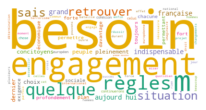

In [53]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']
data_fr = pickle.load(open('data_fr.pkl','rb'))
full_names = data_fr.keys()
print(full_names)

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    print(index, comedian)
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis

In [54]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
10,Nicolas Sarkozy 2009,160
11,Nicolas Sarkozy 2007,195
39,Valéry Giscard d’Estaing 1978,208
13,Jacques Chirac 2005,235
12,Jacques Chirac 2006,240
40,Valéry Giscard d’Estaing 1977,241
38,Valéry Giscard d’Estaing 1979,255
14,Jacques Chirac 2004,255
42,Valéry Giscard d’Estaing 1974,287
31,François Mitterrand 1986,320


In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis

In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.